<a href="https://colab.research.google.com/github/Habibu-Ahmad/Modelling_Ribosome_Motion/blob/main/TASEP/current_density_phase_diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

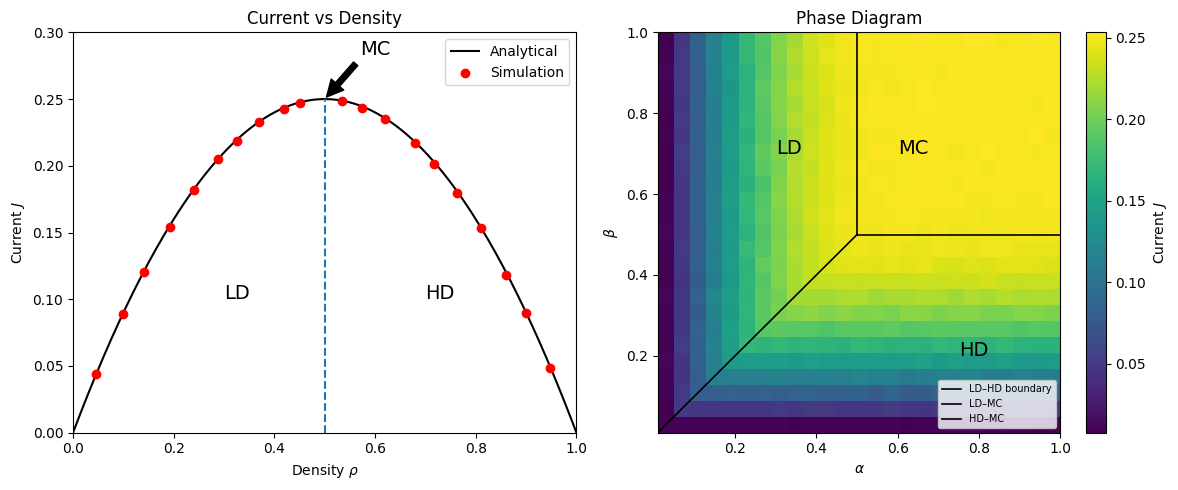

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ====== Simulation Functions ======

def step(site, alpha, beta):
    L = len(site)
    i = np.random.randint(0, L)
    if i == 0:
        if site[i] == 0 and np.random.rand() < alpha:
            site[i] = 1
        elif site[i] == 1 and site[i + 1] == 0:
            site[i] = 0
            site[i + 1] = 1
    elif i == L - 1:
        if np.random.rand() < beta:
            site[i] = 0
    else:
        if site[i] == 1 and site[i + 1] == 0:
            site[i] = 0
            site[i + 1] = 1
    return site

def simulate_current_and_density(L, alpha, beta, Nmax, Ninit):
    site = np.zeros(L, dtype=int)
    current = 0
    steps = 0
    total_density = 0
    for n in range(Nmax):
        prev = np.copy(site)
        site = step(site, alpha, beta)
        if n > Ninit:
            hops = np.sum((prev[:-1] == 1) & (prev[1:] == 0) & (site[:-1] == 0) & (site[1:] == 1))
            current += hops
            total_density += np.sum(site) / L
            steps += 1
    avg_current = current / steps if steps else 0
    avg_density = total_density / steps if steps else 0
    return avg_current, avg_density


# ====== Plotting ======
L = 100
Nmax = 20000* L
Ninit = 2000 * L

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ====== Left Panel: J(rho) ======
rho_values = np.linspace(0, 1, 200)
J_analytical = rho_values * (1 - rho_values)
axes[0].plot(rho_values, J_analytical, label='Analytical', color='black')

# Simulated points using open boundary conditions
target_rhos = np.linspace(0.05, 0.95, 20)  # 20 density points from 0.05 to 0.95
J_sim = []
rho_sim = []

for rho in target_rhos:
    if rho < 0.5:
        alpha = rho
        beta = 1.0
    elif rho > 0.5:
        beta = 1 - rho
        alpha = 1.0
    else:
        alpha = 0.5
        beta = 0.5 # Set alpha and beta to 0.5 for rho=0.5, which corresponds to the MC point

    J, sim_rho = simulate_current_and_density(L, alpha, beta, Nmax, Ninit)
    J_sim.append(J)
    rho_sim.append(sim_rho)




# ====== Right Panel: Phase Diagram (Heatmap) ======
points = 25
alpha_vals = np.linspace(0.01, 1.0, points)
beta_vals = np.linspace(0.01, 1.0, points)
J_map = np.zeros((points, points))

for i, alpha in enumerate(alpha_vals):
    for j, beta in enumerate(beta_vals):
        J, rho = simulate_current_and_density(L, alpha, beta, Nmax, Ninit) # Unpack the tuple here and call the correct function
        J_map[j, i] = J  # Assign only the current to J_map

# Plot heatmap
axes[0].scatter(rho_sim, J_sim, color='red', label='Simulation', marker='o', zorder=3)
axes[0].set_xlabel(r'Density $\rho$')
axes[0].set_ylabel(r'Current $J$')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 0.3)
axes[0].plot([0.5, 0.5], [0, 0.25], linestyle='--')
axes[0].text(0.3, 0.10, 'LD', fontsize=14)
axes[0].text(0.7, 0.10, 'HD', fontsize=14)
# axes[0].text(0.5, 0.26, 'MC', fontsize=14) # Remove this text annotation
axes[0].set_title('Current vs Density')
axes[0].legend()

# Add arrow annotation for MC point
axes[0].annotate('MC', xy=(0.5, 0.25), xytext=(0.6, 0.28), fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='bottom')


# ====== Right Panel: Phase Diagram (Heatmap) ======
points = 25
alpha_vals = np.linspace(0.01, 1.0, points)
beta_vals = np.linspace(0.01, 1.0, points)
J_map = np.zeros((points, points))

for i, alpha in enumerate(alpha_vals):
    for j, beta in enumerate(beta_vals):
        J, rho = simulate_current_and_density(L, alpha, beta, Nmax, Ninit) # Unpack the tuple here and call the correct function
        J_map[j, i] = J  # Assign only the current to J_map

# Plot heatmap
im = axes[1].imshow(J_map, extent=[0.01, 1.0, 0.01, 1.0],
                    origin='lower', cmap='viridis', aspect='auto')
cbar = plt.colorbar(im, ax=axes[1])
cbar.set_label('Current $J$')

#Overlay phase boundaries
alpha_beta = np.linspace(0.01, 0.5, 100)
axes[1].plot(alpha_beta, alpha_beta, 'k-', linewidth=1.2, label='LD–HD boundary')  # LD-HD
axes[1].plot([0.5]*100, np.linspace(0.5, 1, 100), 'k-', linewidth=1.2, label='LD–MC')  # LD-MC
axes[1].plot(np.linspace(0.5, 1, 100), [0.5]*100, 'k-', linewidth=1.2, label='HD–MC')  # HD-MC

#Annotations
axes[1].text(0.3, 0.7, 'LD', color='black', fontsize=14)
axes[1].text(0.75, 0.2, 'HD', color='black', fontsize=14)
axes[1].text(0.6, 0.7, 'MC', color='black', fontsize=14)

axes[1].set_xlabel(r'$\alpha$')
axes[1].set_ylabel(r'$\beta$')
axes[1].set_title('Phase Diagram')
axes[1].legend(loc='lower right', fontsize=7)

plt.tight_layout()
plt.show()